# 허그박스란?
- 유한킴벌리 직영몰 전용 혜택 오직 맘큐에서 진행하는 하기스 기저귀 무료체험
- 대상 : 임신 중 ~ 출산 3개월 이내
- 뒤집기, 걸음마를 시작한 아기에게는 **팬티 허그박스**까지 진행 중
- 월 1만명 이상에게 임신 출산 선물을 제공하고 있으며, 2025.02 보도된 기사에 따르면 연간 출생아 24만명 중 16만명에 달하는 약 60%가 본 서비스 이용
  (우리 데이터는 1년 7개월이란 시간동안 약 1만 1천 건 밖에 확인할 수 없었는데 이는 제공된 데이터가 샘플링된 버전으로 추정됨. 해당 기간의 리뷰 개수가 약 1만 건에 달하는데 리뷰는 소수가 적는 점을 감안하면 실제로는 더 많은 집계가 될 것으로 추정)
- 구성품
  - 아기를 위한 기저귀 샘플 5종 + 물티슈 + 엄마를 위한 초유밀플러스, 수퍼롱 라이너
- 허그박스를 받은 후, 후기 이벤트 진행 중
- 다음은 실제 허그박스 받은 사람의 후기 사진 
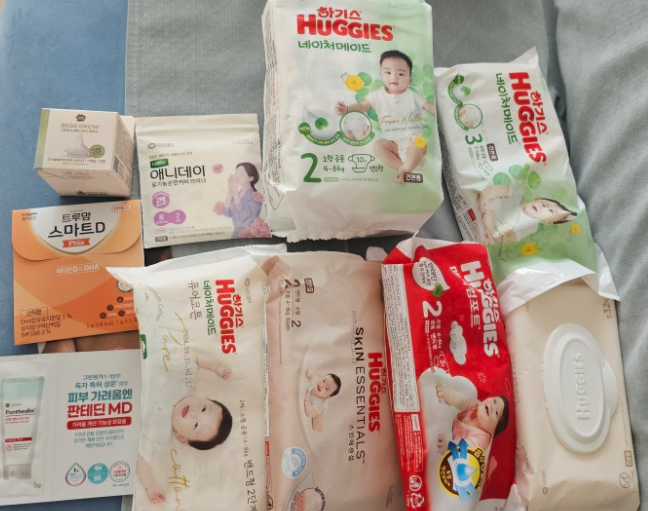
사진 출처 : https://blog.naver.com/narae0363/223892285243

# 분석 방법
- 2018-01-01 ~ 2023-6-23 허그박스 리뷰 데이터 2만 6천 건 스크래핑
- LDA 및 워드클라우드 시각화 진행

# 크롤링 (열어볼 필요없음)

In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# ────────────────── 1. 드라이버 설정 ──────────────────
options = webdriver.ChromeOptions()
# options.add_argument('--headless')  # 창 안 띄우고 싶으면 주석 해제
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)
wait = WebDriverWait(driver, 10)

# ────────────────── 2. 반복 구간 초기화 ──────────────────
start = 1
end = 101
file_no = 1  # 저장용 번호

while True:
    comments_all = []

    # ────────────────── 3. 페이지 반복 ──────────────────
    for page in range(start, end):
        URL = f"https://www.momq.co.kr/shop/neoevent_view.html?ev_no=202004180005&cmt_type=&page={page}"
        try:
            driver.get(URL)

            # 댓글 영역 대기
            ul = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="commentWrap"]/div[3]/ul')))
            driver.execute_script("arguments[0].scrollIntoView(false);", ul)
            time.sleep(0.4)

            # 파싱
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            lis = soup.select('#commentWrap > div.commentListArea > ul > li')
            if not lis:
                print(f"❌ {page}page: 댓글 없음")
                continue

            for li in lis:
                cmt = li.select_one('div > p')
                dt = li.select_one('div > div > span')
                comments_all.append({
                    "page": page,
                    "content": cmt.get_text(strip=True) if cmt else '',
                    "date": dt.get_text(strip=True) if dt else ''
                })

            print(f"✅ {page}page → {len(lis)}개 수집")

        except TimeoutException:
            print(f"⚠️ {page}page: 로딩 실패")

    # ────────────────── 4. 저장 ──────────────────
    df = pd.DataFrame(comments_all)
    df.to_csv(f"./review/momq_comments_{file_no}.csv", index=False, encoding="utf-8-sig")
    print(f"\n🎉 총 {len(df)}개 저장 완료 → momq_comments_{file_no}.csv")

    # 다음 구간 설정
    start += 100
    end += 100
    file_no += 1

    if end > 2600:
        break

# ────────────────── 5. 드라이버 종료 ──────────────────
driver.quit()

✅ 1page → 10개 수집
✅ 2page → 10개 수집
✅ 3page → 10개 수집
✅ 4page → 10개 수집
✅ 5page → 10개 수집
✅ 6page → 10개 수집
✅ 7page → 10개 수집
✅ 8page → 10개 수집
✅ 9page → 11개 수집
✅ 10page → 10개 수집
✅ 11page → 10개 수집
✅ 12page → 10개 수집
✅ 13page → 10개 수집
✅ 14page → 10개 수집
✅ 15page → 10개 수집
✅ 16page → 10개 수집
✅ 17page → 10개 수집
✅ 18page → 10개 수집
✅ 19page → 10개 수집
✅ 20page → 10개 수집
✅ 21page → 10개 수집
✅ 22page → 10개 수집
✅ 23page → 10개 수집
✅ 24page → 10개 수집
✅ 25page → 10개 수집
✅ 26page → 10개 수집
✅ 27page → 10개 수집
✅ 28page → 10개 수집
✅ 29page → 10개 수집
✅ 30page → 10개 수집
✅ 31page → 10개 수집
✅ 32page → 10개 수집
✅ 33page → 10개 수집
✅ 34page → 10개 수집
✅ 35page → 10개 수집
✅ 36page → 10개 수집
✅ 37page → 10개 수집
✅ 38page → 10개 수집
✅ 39page → 10개 수집
✅ 40page → 10개 수집
✅ 41page → 10개 수집
✅ 42page → 10개 수집
✅ 43page → 10개 수집
✅ 44page → 10개 수집
✅ 45page → 10개 수집
✅ 46page → 10개 수집
✅ 47page → 10개 수집
✅ 48page → 10개 수집
✅ 49page → 10개 수집
✅ 50page → 10개 수집
✅ 51page → 10개 수집
✅ 52page → 11개 수집
✅ 53page → 10개 수집
✅ 54page → 10개 수집
✅ 55page → 10개 수집
✅ 56page → 10개 수집
✅

# 데이터병합

In [63]:
import os
import pandas as pd
import numpy as np
#os.chdir('./review')
df1 = pd.read_csv('momq_comments_1.csv')
df2 = pd.read_csv('momq_comments_10.csv')
df3 = pd.read_csv('momq_comments_11.csv')
df4 = pd.read_csv('momq_comments_12.csv')
df5 = pd.read_csv('momq_comments_13.csv')
df6 = pd.read_csv('momq_comments_14.csv')
df7 = pd.read_csv('momq_comments_15.csv')
df8 = pd.read_csv('momq_comments_16.csv')
df9 = pd.read_csv('momq_comments_17.csv')
df10 = pd.read_csv('momq_comments_18.csv')
df11= pd.read_csv('momq_comments_19.csv')
df12 = pd.read_csv('momq_comments_2.csv')
df13 = pd.read_csv('momq_comments_20.csv')
df14 = pd.read_csv('momq_comments_21.csv')
df15 = pd.read_csv('momq_comments_22.csv')
df16 = pd.read_csv('momq_comments_23.csv')
df17 = pd.read_csv('momq_comments_24.csv')
df18 = pd.read_csv('momq_comments_25.csv')
df20 = pd.read_csv('momq_comments_3.csv')
df21 = pd.read_csv('momq_comments_4.csv')
df22 = pd.read_csv('momq_comments_5.csv')
df23 = pd.read_csv('momq_comments_6.csv')
df24 = pd.read_csv('momq_comments_7.csv')
df25 = pd.read_csv('momq_comments_8.csv')
df26 = pd.read_csv('momq_comments_9.csv')

# 파일명을 숫자 기준으로 정렬
file_list = [f'momq_comments_{i}.csv' for i in range(1, 26)]

# 데이터프레임 합치기
df_all = pd.concat([pd.read_csv(f) for f in file_list], axis=0, ignore_index=True)
df = df_all.drop(columns='page', axis=1)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M', errors='coerce')
df = df.sort_values(by='date').reset_index(drop=True)
df['date'] = df['date'].dt.date
df.shape

(25249, 2)

In [64]:
blog = df[df.content.str.contains('blog', na=False)].shape[0] / df.shape[0]
insta = df[df.content.str.contains('insta', na=False)].shape[0] / df.shape[0]
http = df[df.content.str.contains('http', na=False)].shape[0] / df.shape[0]

display(HTML(f'블로그 작성비율 : <b>{blog*100:.1f}%</b>'))
display(HTML(f'인스타 작성비율 : <b>{insta*100:.1f}%</b>'))
display(HTML(f'모든 SNS 작성비율 : <b>{http*100:.1f}%</b>'))

In [ ]:
# 저장 (선택)
#df.to_csv('momq_comments_all.csv', index=False, encoding='utf-8-sig')

# 전처리

In [65]:
df['date'].min(), df['date'].max()

(datetime.date(2018, 5, 23), datetime.date(2025, 6, 24))

In [66]:
# datetime 변환 (혹시 안 했다면)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 날짜 필터링 (2018년 1월 1일 이후 데이터만)
cond1 = df['date'] >= pd.to_datetime('2018-01-01')
df = df[cond1].reset_index(drop=True)
df

,content,date
0,세번도전끝에단첨?네요~~~감사합니다~~~^^첫째때부터 하기스로 통일~~,2018-05-23
1,지인 소개로 하기스 썼다가 맘큐에 가입하게 되었습니다 하기스는 다른것보다 보송보송 ...,2018-05-23
2,첫 아기라 기저귀에 대해 꼼꼼히 써보고 싶었는데 당첨되서 너무 행복하네요! 열심히 ...,2018-05-23
3,"23주차 셋째아이 임산부에요~ 첫째, 둘째아이 모두 하기스로 키웠는데 생각지도않던 ...",2018-05-23
4,너무당첨되고써보고싶었는데 아이볼날이얼마안남은이시점에드뎌당첨이되어서너무 기분좋습니다...,2018-05-23
...,...,...
25244,다양하게 써볼 수 있어서 너무 좋습니다^^,2025-06-23
25245,https://blog.naver.com/goodidea925/22390936094...,2025-06-24
25246,https://m.blog.naver.com/mjsin93/223909050618하...,2025-06-24
25247,구성품도 좋고 아기가 태어나면써보고 정착할거같아요감사히 잘쓰겠습니다!,2025-06-24


In [67]:
# 띄어쓰기 보정
from pykospacing import Spacing
spacing = Spacing()

df['content'] = df['content'].apply(lambda x: spacing(x) if isinstance(x, str) else '')
df['content'].head()

0          세 번 도전 끝에 단첨?네요~~~감사합니다~~~ 첫째 때부터 하기스로 통일~~
1    지인 소개로 하기스 썼다가 맘큐에 가입하게 되었습니다 하기스는 다른 것보다 보송보송...
2    첫 아기라 기저귀에 대해 꼼꼼히 써보고 싶었는데 당첨되서 너무 행복하네요! 열심히 ...
3    23주차 셋째 아이 임산부에 요~ 첫째, 둘째 아이 모두 하기스로 키웠는데 생각지도...
4    너무 당첨되고 써보고 싶었는데 아이볼날이 얼마 안 남은 이 시점에 드뎌 당첨이 되어...
Name: content, dtype: object

In [68]:
# 시기별로 데이터 분할 :  우리 데이터 전 2021-2023, 우리 데이터 기간 2022-2023.08, 이후부터 현재까지
# 1. 2018~2021년까지
df201821 = df[df['date'] < '2022-01-01'].drop_duplicates()

# 2. 2022년 1월 1일 ~ 2023년 8월 8일
df202123 = df[(df['date'] >= '2022-01-01') & (df['date'] <= '2023-08-08')].drop_duplicates()

# 3. 2023년 8월 8일 이후
df202324 = df[df['date'] > '2023-08-08'].drop_duplicates()

df201821.shape, df202123.shape, df202324.shape

((10402, 2), (9694, 2), (5089, 2))

# Okt 형태소 분석기 활용하여 3가지 시점별 허그박스 반응 워드클라우드화
- 2018.01.01 ~ 2021.12.31 (우리 데이터 전)
- 2022.01.01 ~ 2023.08.08 (우리 데이터와 동일 기간)
- 2023.08.09 ~ 2025.06.24 (우리 데이터 이후 시점부터 현재까지)

In [76]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer

# 1. 한글 전처리 (비한글 문자 제거 + 공백 정리 + NaN 처리)
def 한글_정제(df):
    df['content'] = df['content'].replace('[^ㄱ-하-ㅣ가-힣 ]', '', regex=True)  # 한글만
    df['content'] = df['content'].replace('^ +', '', regex=True)  # 공백만 제거
    df['content'] = df['content'].replace('', np.nan)
    df = df.dropna()
    df = df[~df['content'].str.contains('blog|insta|http', na=False)]
    df = df.reset_index(drop=True)
    return df

# 2. 불용어 사전 통합
불용어 = {
    '의', '이', '가', '은', '는', '을', '를', '에', '에서', '도', '으로', '로', '와', '과',
    '하게', '한', '함', '요', '니다', '좀', '잘', '것', '수', '해', '더', '같아요', '같아',
    '되다', '있다', '없다', '하다', '정말', '해서', '그리고', '그런데', '이런', '저런', '그런',
    '합니다', '입니다', '없는', '있는', '인데', '해도', '또한', '하지만', '해주시고', '주시고',
    'ㅎㅎ', 'ㅋㅋ', '게요', '되었어요', '되었답니다', '되었는데', '했네요', '했어요', '했음', 
    '했지만', '했답니다', '하겠습니다', '하구요', '하시', '하는데요', '되네요', '있네요',
    '있었어요', '있었답니다', '없었어요', '없었답니다', '네', '근데', '그래도', '이지만', 
    '어떤', '왜', '또', '다', '등', '및', '까지', '많이', '조금', '아주', '되게', '정말로', 
    '완전', '되었네요', '이예요', '좋네요', '좋았어요', '좋았네요', '좋구요', '좋겠어요', 
    '좋을', '좋은데', '좋습니다', '좋아요', '감사', '감사해요', '감사합니다', '감사합니당', 
    '감사할', '감사히', '하겠습니', '해봐요', '해봤어요', '해보려구요', '해봤는데', 
    '해보면서', '되니까', '좋겠네요', '좋았', '쓸게요', '쓸께요', '쓸께', '쓸게', '써요', 
    '썼어요', '썼어용', '써야', '써보려', '써보니', '써보려고', '써보고', '써봤는데', 
    '써보면', '쓰고', '쓰고있어요', '쓰는중', '쓰고있습니다',
    '박스', '허그', '하기스', '기저귀', '사용','있어서','하고','너무','아기','제품'
}

# 3. Okt 기반 형태소 분석 + 불용어 제거
tk = Okt()

def 전처리(df_subset):
    X_data = []
    for 문장 in tqdm(df_subset['content']):
        토큰화 = tk.morphs(문장)
        필터링 = [단어 for 단어 in 토큰화 if 단어 not in 불용어 and len(단어) > 1]
        X_data.append(' '.join(필터링))
    return X_data

# 4. 단어 빈도 추출 함수
def 단어빈도(X_data):
    tk2 = Tokenizer()
    tk2.fit_on_texts(X_data)
    return tk2.word_counts

# ──────────────────────── 전체 실행 예시 ────────────────────────
# 데이터프레임 정제
df201821 = 한글_정제(df201821)
df202123 = 한글_정제(df202123)
df202324 = 한글_정제(df202324)

# 텍스트 전처리
X_201821 = 전처리(df201821)
X_202123 = 전처리(df202123)
X_202324 = 전처리(df202324)

# 단어 빈도 계산
counts_201821 = 단어빈도(X_201821)
counts_202123 = 단어빈도(X_202123)
counts_202324 = 단어빈도(X_202324)


100%|█████████████████████████████████████████████████████████████████████████████| 5030/5030 [00:29<00:00, 168.32it/s]


In [77]:
# 워드클라우드 함수 정의
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_wordcloud(word_counts, title=''):
    min_freq=200
    filtered_counts = {word: freq for word, freq in word_counts.items() if freq >= min_freq}
    
    # 2. 워드클라우드 생성
    wordcloud = WordCloud(
        font_path='../NanumGothicCoding.ttf',
        width=800, height=400, background_color='white'
    ).generate_from_frequencies(filtered_counts)
    
    # 3. 시각화
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{title} (빈도 ≥ {min_freq})", fontsize=16)
    plt.show()

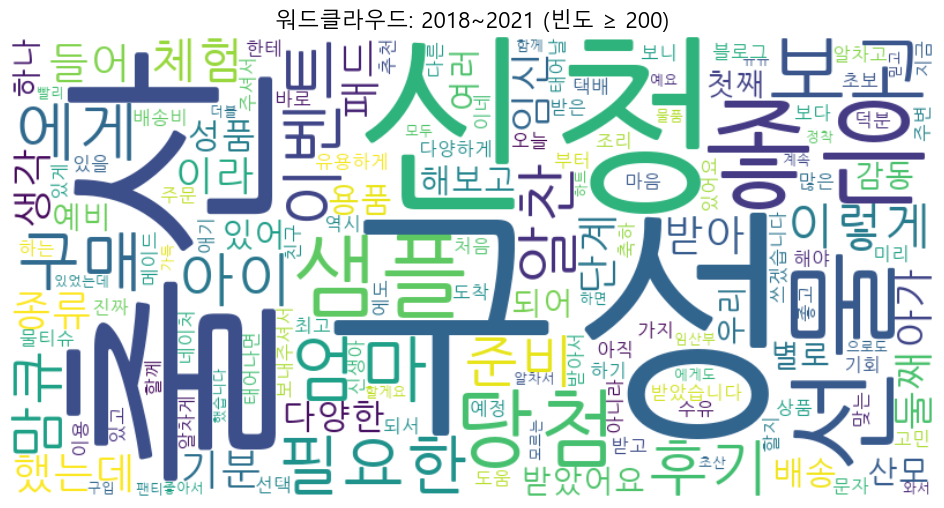

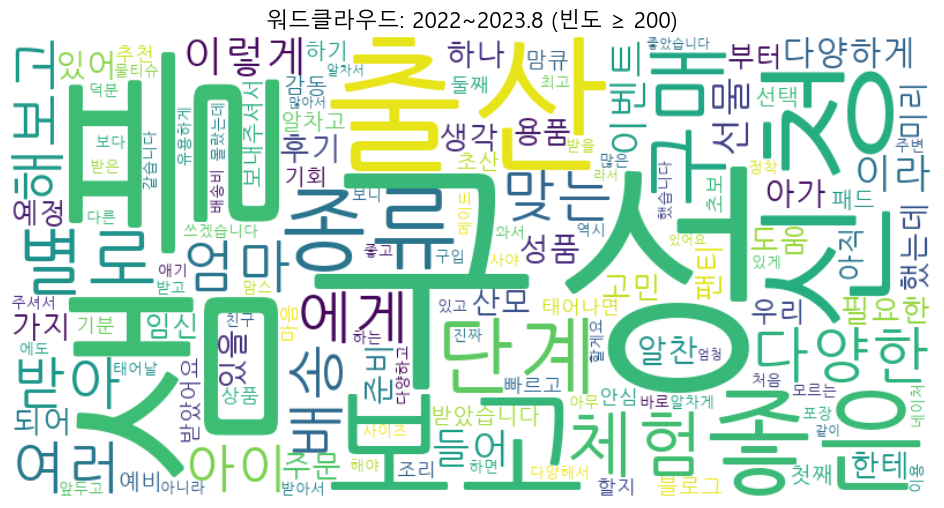

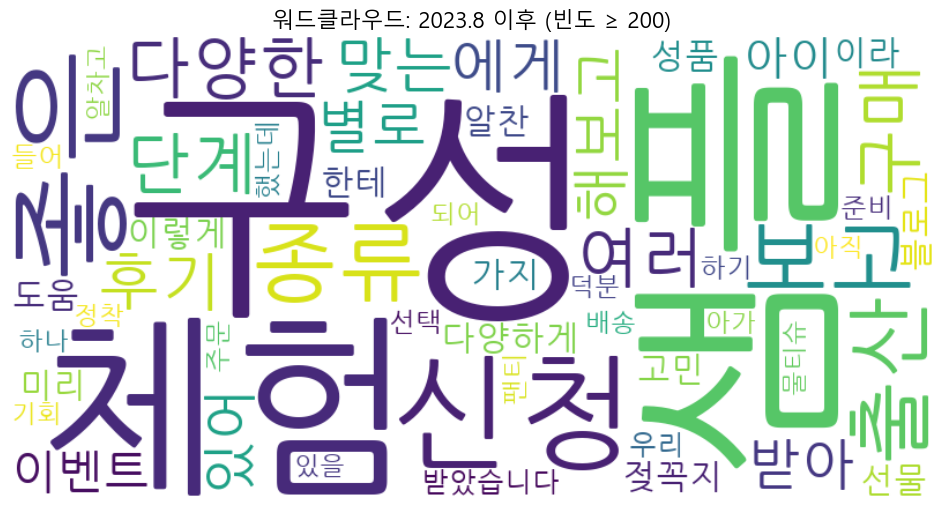

In [78]:
# 워드클라우드 출력
draw_wordcloud(counts_201821, title='워드클라우드: 2018~2021')
draw_wordcloud(counts_202123, title='워드클라우드: 2022~2023.8')
draw_wordcloud(counts_202324, title='워드클라우드: 2023.8 이후')

# 키위 라이브러리 활용하여 3가지 시점별 허그박스 반응 워드클라우드화  
-> 너무 명사 형용사 동사 구분이 안 되는 듯해서

In [28]:
import pandas as pd
from kiwipiepy import Kiwi
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Kiwi 형태소 분석기
kiwi = Kiwi()

# 타겟 품사 (명사, 동사, 형용사)
target_pos = {'NNG', 'NNP', 'VA', 'VV'} # 차례로 일반 명사, 고유 명사, 형용사, 동사

# 불용어 통합
불용어 = 불용어1 | 불용어2 | 불용어3  # set 합집합

# 형태소 추출 함수
def extract_keywords(text):
    if pd.isna(text):
        return []
    tokens = kiwi.tokenize(text)
    words = []
    for token in tokens:
        if token.tag in target_pos:
            word = token.form  # 원형 그대로 사용
            if word not in 불용어 and len(word) > 1:
                words.append(word)
    return words


In [29]:
# 예: 연도별로 데이터프레임을 나눴다면
# df_201821, df_202123, df_202324 등의 형태로 사용 가능

def get_word_freq(df, text_col='content'):
    word_list = df[text_col].apply(extract_keywords).sum()
    return Counter(word_list)


In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def draw_wordcloud(word_counts, title='', top_n=50):
    # 상위 N개 단어만 선택
    sorted_counts = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:top_n])
    
    wordcloud = WordCloud(
        font_path='../NanumGothicCoding.ttf',  # 한글 폰트 경로
        width=800, height=400, background_color='white'
    ).generate_from_frequencies(sorted_counts)

    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{title} (상위 {top_n}개 단어)", fontsize=16)
    plt.show()


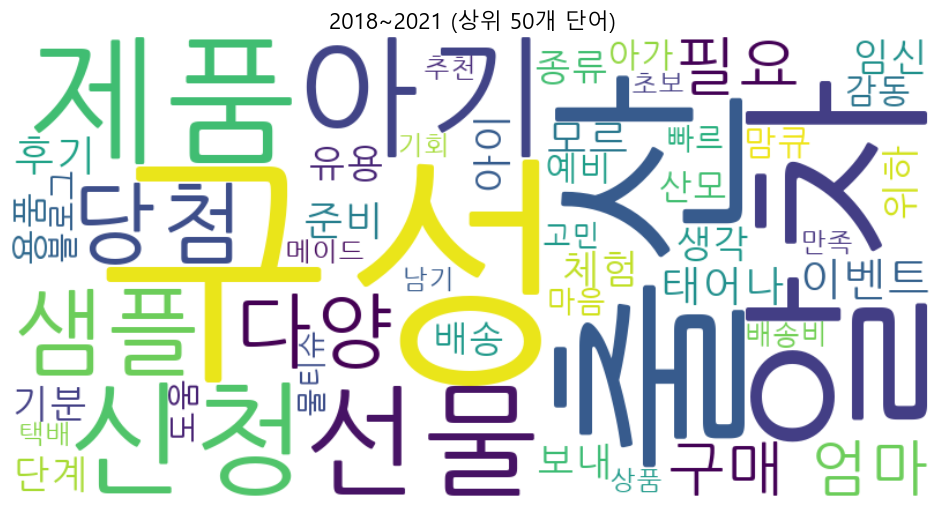

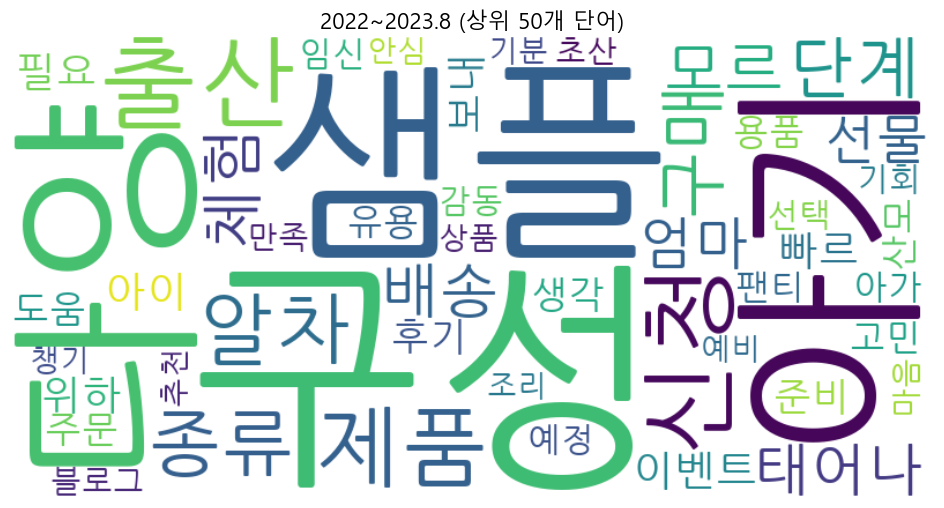

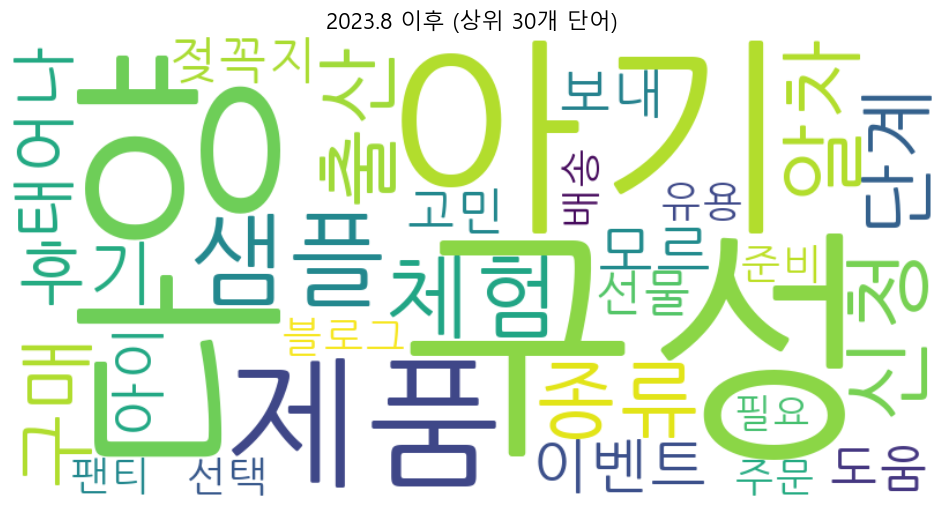

In [31]:
# 연도별 리뷰 데이터프레임이 있을 경우 예시
counts_201821 = get_word_freq(df201821)
counts_202123 = get_word_freq(df202123)
counts_202324 = get_word_freq(df202324)

draw_wordcloud(counts_201821, title='2018~2021', top_n=50)
draw_wordcloud(counts_202123, title='2022~2023.8', top_n=50)
draw_wordcloud(counts_202324, title='2023.8 이후', top_n=30)

# 결과적으로는 더 다양한 의미적 요소를 보이는 게 Okt 활용한 거라 Okt 사용

# ✅ 연도별 LDA 토픽 모델링 -> 얘가 제일 유의한 듯

## 📘 텍스트 마이닝 분석 방법 정리

### 1. **데이터 전처리 및 형태소 분석**

* **형태소 분석기:** `Kiwi (kiwipiepy)`

  * 한국어 자연어처리용 오픈소스 형태소 분석기 활용
  * `tokenize()` 함수를 통해 리뷰 텍스트를 **형태소 단위로 분해**
* **추출 대상 품사:**

  * 일반명사(`NNG`), 고유명사(`NNP`), 형용사(`VA`), 동사(`VV`)
* **불용어 제거:**

  * 자주 등장하지만 분석적 의미가 적은 단어(예: "좋아요", "있어요", "해요" 등)를 **사용자 지정 불용어**로 제거
* **토큰 필터링 조건:**

  * 의미 있는 단어만 추출하기 위해 **불용어 필터링**, **2자 이하 단어 제외**
* **최종 문서 구성:**

  * 전처리된 각 문서는 공백으로 구분된 키워드 문자열로 구성됨

---

### 2. **문서 벡터화**

* **벡터화 도구:** `CountVectorizer` (sklearn)

  * 전처리된 문서를 기반으로 **BoW(Bag of Words)** 방식으로 단어 빈도 행렬 생성
  * 각 단어를 피처로 보고 문서-단어 행렬 생성

---

### 3. **토픽 모델링 (LDA)**

* **모델:** `Latent Dirichlet Allocation` (LDA, sklearn 사용)

  * **비지도 학습 기반의 토픽 모델링 기법**
  * 문서 집합 내 잠재 주제를 추출하고 각 토픽에서의 대표 키워드를 확인
* **파라미터 설정:**

  * 주제 수(`n_topics`) = 3
  * 각 주제별 상위 키워드 수(`top_n`) = 10
* **출력:**

  * `Topic 1`, `Topic 2`, `Topic 3` 형식으로 토픽별 대표 키워드 추출

---

### 4. **연도별 분석 적용**

* 세 시기로 구분된 리뷰 데이터프레임(`df201821`, `df202123`, `df202324`)에 대해 **동일한 전처리 및 LDA 적용**
* 연도별로 **고객 후기의 주요 주제 변화** 확인

---

### 🔍 요약

> 고객 후기 데이터에 대해 Kiwi 형태소 분석기를 이용한 전처리를 수행하였으며, 일반명사, 고유명사, 동사, 형용사만을 추출한 후 사용자 정의 불용어 및 1자 단어를 제거하였다. 전처리된 문서는 CountVectorizer로 벡터화하고, sklearn의 LDA(Latent Dirichlet Allocation) 기법을 통해 연도별 주요 주제를 3개씩 추출하였다. 각 토픽별로 상위 10개 키워드를 확인하여 시기별 주요 관심사 변화를 분석하였다.

In [35]:
import pandas as pd
from kiwipiepy import Kiwi
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Kiwi 초기화 및 설정
kiwi = Kiwi()
target_pos = {'NNG', 'NNP', 'VA', 'VV'}  # 명사, 형용사, 동사
stopwords = {'좋아요', '해요', '했어요', '있어요', '없어요', '합니다', '입니다'}  # 커스터마이징 가능

# 형태소 분석 및 불용어 제거
def tokenize_and_filter(text):
    if pd.isna(text): return ''
    tokens = kiwi.tokenize(text)
    return ' '.join([
        token.form for token in tokens
        if token.tag in target_pos and token.form not in stopwords and len(token.form) > 1
    ])

# 전처리 함수
def prepare_docs(df, text_col='content'):
    return df[text_col].apply(tokenize_and_filter)

# LDA 수행 함수
def lda_topic_keywords(docs, n_topics=3, top_n=10):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(docs)
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)
    
    words = vectorizer.get_feature_names_out()
    result = {}
    for topic_idx, topic in enumerate(lda.components_):
        top_keywords = [words[i] for i in topic.argsort()[:-top_n - 1:-1]]
        result[f'Topic {topic_idx+1}'] = top_keywords
    return pd.DataFrame(result)

# 연도별 전처리 및 LDA 적용
docs_201821 = prepare_docs(df201821)
docs_202123 = prepare_docs(df202123)
docs_202324 = prepare_docs(df202324)

lda_201821 = lda_topic_keywords(docs_201821)
lda_202123 = lda_topic_keywords(docs_202123)
lda_202324 = lda_topic_keywords(docs_202324)

In [39]:
from IPython.display import display, HTML

display(HTML("<span style='font-size:14px; font-weight:bold;'>🔹 2018~2021 LDA Topics</span>"))
display(pd.DataFrame(lda_201821))

display(HTML("<span style='font-size:14px; font-weight:bold;'>🔹 2022~2023.8 LDA Topics</span>"))
display(pd.DataFrame(lda_202123))

display(HTML("<span style='font-size:14px; font-weight:bold;'>🔹 2023.8 이후 LDA Topics</span>"))
display(pd.DataFrame(lda_202324))

,Topic 1,Topic 2,Topic 3
0,박스,하기스,후기
1,구성,기저귀,당첨
2,감사,박스,감사
3,알차,사용,출산
4,사용,출산,배송
5,하기스,제품,구성
6,선물,아기,블로그
7,아기,감사,박스
8,신청,샘플,빠르
9,기저귀,아이,이벤트


,Topic 1,Topic 2,Topic 3
0,구성,기저귀,하기스
1,사용,종류,박스
2,알차,박스,기저귀
3,제품,감사,아기
4,감사,샘플,출산
5,배송,다양,엄마
6,다양,아기,위하
7,샘플,신청,감사
8,빠르,출산,선물
9,박스,모르,산모


,Topic 1,Topic 2,Topic 3
0,기저귀,기저귀,후기
1,구성,박스,박스
2,사용,하기스,블로그
3,감사,단계,이벤트
4,하기스,체험,감사
5,박스,사용,신청
6,다양,신청,구성
7,샘플,아기,작성
8,제품,다양,하기스
9,아기,젖꼭지,출산


- 2023년 8월 이후에는, 기존에 중심을 이루던 “기저귀”, “아기”, “샘플” 등 제품 중심 키워드 외에도 “블로그”, “체험”, “작성”, “참여”와 같은 키워드가 새롭게 등장하였다.
- 이는 후기 작성 방식이 단순 구매 경험 공유에서 벗어나, 블로그 기반 체험단 이벤트 참여 등 콘텐츠 마케팅 방식으로 전환되고 있음을 시사함. 실제로 리뷰 중에선 본인이 게시한 블로그 링크를 함께 첨부한 리뷰가 다수 있었음
- 허그박스 제공이 단순한 캠페인 사업에서 멈추지 않고 기업 이미지 제고에 더불어, 소비자들이 자발적으로 홍보하는 수단이 되고 있음

- 우리 데이터 이후 가장 최근 두드러지는 키워드는 새로운 주제 Topic3에 후기, 이벤트, 블로그, 작성이 치고 올라왔다는 것
- 이는 2023년도?쯤부터 네이버 블로그가 활성화되면서"블로그", "체험단" 등 SNS 활용한 마케팅 전략 강화의 성과가 있는 것으로 보임
- 전반적으로는 모르는 출산에 대해 먼저 챙겨주는 것에 감사함을 느끼며, 다양한 기저귀, 알찬 구성을 좋아하는 것으로 보임
- 알차게 들어있고 다양하게 써보며 아이에게 맞는 기저귀를 찾아줄 수 있어 좋아하는 분위기
-> 지피티로 한 번 더 정리

## ✅ 연도별 리뷰 분석 인사이트 요약

1. **2023년 이후**, `후기`, `이벤트`, `블로그`, `작성` 등의 단어가 **새로운 토픽 (Topic 3)** 에서 **급부상**  
   → 이는 **네이버 블로그 체험단 활성화** 및 **SNS 중심 마케팅 전략**의 영향으로 해석됨  
   → 특히 `"블로그"`, `"체험단"`, `"작성"`, `"참여"` 등의 키워드가 함께 등장하며 **리뷰 유도 캠페인** 효과가 리뷰에 반영되고 있음

   -> 이런 홍보 전략은 성과있는 수단이므로 지속할 필요가 있음

3. 전반적으로 리뷰 전 시기에 걸쳐 **“모르는 출산에 대해 먼저 챙겨주는 것”에 대한 감사**의 표현이 반복됨
   → `"감사"`, `"신청"`, `"선물"`, `"박스"` 등 키워드가 반복 등장하며 **허그박스에 대한 긍정적 감정**을 나타냄

   -> 이 캠페인은 고객들에게 맘큐의 이미지를 긍정적으로 비추고 있음이 확인됨

5. 사용 후기에서는 **기저귀 종류의 다양성**과 **알찬 구성**에 대한 만족도가 높음  
   → `"다양"`, `"기저귀"`, `"구성"`, `"알차다"` 등 키워드가 주요하게 등장하며  
   → **구성품의 실용성과 다양한 기저귀를 체험해볼 수 있는 것**이 제품 만족에 큰 영향을 주는 것으로 판단됨  
   → 아기가 뒤집기 시작할 때 7개월쯤 **팬티 허그박스** 이벤트에 참여하라고 권하는 것 좋을 듯 -> 자연스레 하기스 팬티형 기저귀를 체험하게 하며 장기고객으로 만드는 전략
---

## 📌 전략적 시사점

* ✅ **블로그 후기 기반 마케팅 강화**는 긍정적 성과를 나타내고 있으며, 이를 유지 및 확장할 필요 있음
* ✅ 고객의 **“감사” 경험**을 더 강화할 수 있는 콘텐츠(예: 편지 동봉, 케어 가이드 등)도 함께 고려해볼 수 있음
* ✅ 후기 기반으로 **기저귀 구성 옵션 확대**나 **맞춤형 패키지 추천**과 같은 서비스를 추가로 기획하면 제품 만족도를 높일 수 있음

---